In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

X=[1,2,3]
Y=[1,2,3]

W=tf.placeholder(tf.float32)

#Our hypothesis for linear model X*W
hypothesis=X*W

#cost/loss function
cost=tf.reduce_mean(tf.square(hypothesis-Y))

#Launch the graph in a session
sess=tf.Session()

#Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

#Variables for plotting cost function
W_val=[]
cost_val=[]

for i in range(-30,50):
    feed_W=i*0.1
    curr_cost,curr_W=sess.run([cost,W],feed_dict={W:feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
#Show the cost function
plt.plot(W_val,cost_val)
plt.show()

AttributeError: module 'tensorflow' has no attribute 'placeholder'

Step 0, Loss: 11.401963233947754, W: [-0.23499337], b: [-0.3578303]
Step 10, Loss: 1.0886720418930054, W: [0.5732764], b: [-0.0066811]
Step 20, Loss: 0.10650742799043655, W: [0.82377446], b: [0.09920824]
Step 30, Loss: 0.012852703221142292, W: [0.90213156], b: [0.1294749]
Step 40, Loss: 0.0038075789343565702, W: [0.927345], b: [0.13646345]
Step 50, Loss: 0.00282487110234797, W: [0.9361349], b: [0.13632484]
Step 60, Loss: 0.0026155870873481035, W: [0.9398328], b: [0.13404152]
Step 70, Loss: 0.0024853753857314587, W: [0.9419361], b: [0.13114971]
Step 80, Loss: 0.0023678711149841547, W: [0.9435244], b: [0.12812212]
Step 90, Loss: 0.002256522886455059, W: [0.94493145], b: [0.12510341]


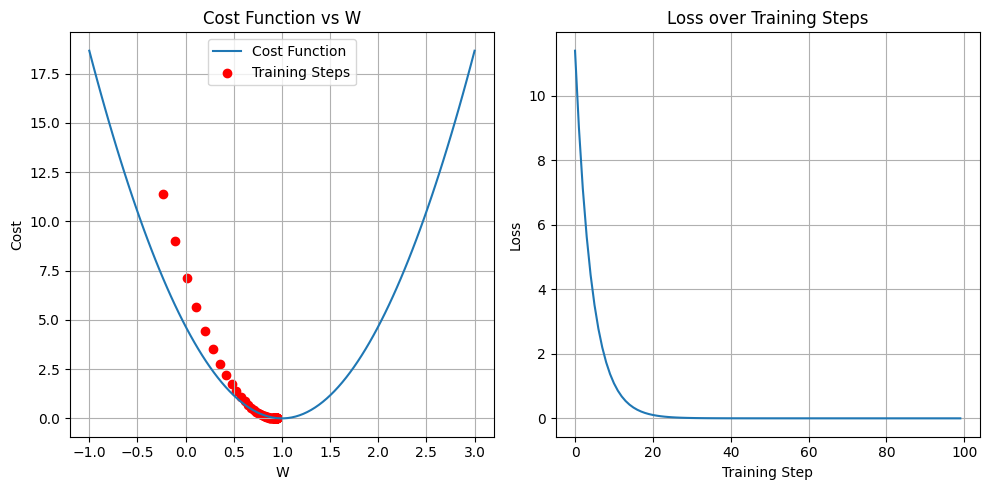

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 데이터 정의
x_train = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)
y_train = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)

# 변수 정의
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# 학습률 및 옵티마이저 정의
learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate)

# 손실 기록을 위한 리스트
loss_history = []
W_history = []

# 학습 과정
for step in range(100):  # 100번 반복
    with tf.GradientTape() as tape:
        # 예측값 계산
        y_pred = x_train * W + b
        # 손실 함수 (MSE)
        loss = tf.reduce_mean(tf.square(y_train - y_pred))
    
    # 그라디언트 계산
    gradients = tape.gradient(loss, [W, b])
    # 옵티마이저로 변수 업데이트
    optimizer.apply_gradients(zip(gradients, [W, b]))
    
    # 손실 기록
    loss_history.append(loss.numpy())
    W_history.append(W.numpy()[0])
    
    # 10회마다 출력
    if step % 10 == 0:
        print(f"Step {step}, Loss: {loss.numpy()}, W: {W.numpy()}, b: {b.numpy()}")

# 손실 함수(cost function) 그리기
W_values = np.linspace(-1.0, 3.0, 100)  # W의 범위
cost_values = []

for W_val in W_values:
    y_pred = x_train * W_val
    cost = tf.reduce_mean(tf.square(y_train - y_pred))
    cost_values.append(cost.numpy())

# 그래프 그리기
plt.figure(figsize=(10, 5))

# 손실 함수
plt.subplot(1, 2, 1)
plt.plot(W_values, cost_values, label='Cost Function')
plt.scatter(W_history, loss_history, color='red', label='Training Steps')
plt.title("Cost Function vs W")
plt.xlabel("W")
plt.ylabel("Cost")
plt.legend()
plt.grid()

# 손실 값 변화
plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.title("Loss over Training Steps")
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.grid()

plt.tight_layout()
plt.show()


In [6]:
import tensorflow as tf
x_data=[1,2,3]  
y_data=[1,2,3]

W=tf.Variable(tf.random.normal([1]),name='weight')
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

hypothesis=X*W

cost=tf.reduce_sum(tf.square(hypothesis-Y))

#Minimize
learning_rate=0.1
gradient=tf.reduce_mean((W*X-Y)*X)
descent=W-learning_rate*gradient
update=W.assign(descent)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.fun(update, feed_dict={X:x_data, Y:y_data})
    print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}),sess.run(W))

AttributeError: module 'tensorflow' has no attribute 'random_normal'

In [7]:
import tensorflow as tf

# 데이터 정의
x_data = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)
y_data = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)

# 변수 정의
W = tf.Variable(tf.random.normal([1]), name='weight')

# 학습률
learning_rate = 0.1

# 학습 과정
for step in range(21):
    with tf.GradientTape() as tape:
        # 가설과 손실 함수
        hypothesis = x_data * W
        cost = tf.reduce_sum(tf.square(hypothesis - y_data))
    
    # 그라디언트 계산
    gradient = tape.gradient(cost, [W])[0]
    
    # 경사 하강법 수식에 따라 W 업데이트
    descent = W - learning_rate * gradient
    W.assign(descent)
    
    # 출력
    print(f"Step: {step}, Cost: {cost.numpy()}, W: {W.numpy()}")


Step: 0, Cost: 0.5115408897399902, W: [1.3440714]
Step: 1, Cost: 1.6573916673660278, W: [0.3806715]
Step: 2, Cost: 5.369948863983154, W: [2.1147914]
Step: 3, Cost: 17.398637771606445, W: [-1.0066247]
Step: 4, Cost: 56.37159729003906, W: [4.611924]
Step: 5, Cost: 182.64395141601562, W: [-5.501463]
Step: 6, Cost: 591.7662353515625, W: [12.702635]
Step: 7, Cost: 1917.3231201171875, W: [-20.064741]
Step: 8, Cost: 6212.1259765625, W: [38.916534]
Step: 9, Cost: 20127.291015625, W: [-67.24976]
Step: 10, Cost: 65212.42578125, W: [123.84959]
Step: 11, Cost: 211288.28125, W: [-220.12927]
Step: 12, Cost: 684574.1875, W: [399.0327]
Step: 13, Cost: 2218020.5, W: [-715.45886]
Step: 14, Cost: 7186385.5, W: [1290.626]
Step: 15, Cost: 23283892.0, W: [-2320.327]
Step: 16, Cost: 75439816.0, W: [4179.3887]
Step: 17, Cost: 244425040.0, W: [-7520.1006]
Step: 18, Cost: 791937280.0, W: [13538.981]
Step: 19, Cost: 2565877248.0, W: [-24367.371]
Step: 20, Cost: 8313444352.0, W: [43864.066]


In [8]:
import tensorflow as tf

# 데이터 정의
x_data = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)
y_data = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)

# 변수 정의
W = tf.Variable(tf.random.normal([1]), name='weight')

# 학습률
learning_rate = 0.01

# 학습 과정
for step in range(21):
    with tf.GradientTape() as tape:
        # 가설과 손실 함수
        hypothesis = x_data * W
        cost = tf.reduce_sum(tf.square(hypothesis - y_data))
    
    # 그라디언트 계산
    gradient = tape.gradient(cost, [W])[0]
    
    # 경사 하강법 수식에 따라 W 업데이트
    descent = W - learning_rate * gradient
    W.assign(descent)
    
    # 출력
    print(f"Step: {step}, Cost: {cost.numpy()}, W: {W.numpy()}")


Step: 0, Cost: 86.09292602539062, W: [-0.78546864]
Step: 1, Cost: 44.630577087402344, W: [-0.28553742]
Step: 2, Cost: 23.136489868164062, W: [0.07441306]
Step: 3, Cost: 11.993956565856934, W: [0.3335774]
Step: 4, Cost: 6.217667102813721, W: [0.5201757]
Step: 5, Cost: 3.223238945007324, W: [0.6545265]
Step: 6, Cost: 1.6709274053573608, W: [0.7512591]
Step: 7, Cost: 0.866208553314209, W: [0.8209065]
Step: 8, Cost: 0.44904276728630066, W: [0.8710527]
Step: 9, Cost: 0.23278379440307617, W: [0.90715796]
Step: 10, Cost: 0.1206749975681305, W: [0.93315375]
Step: 11, Cost: 0.06255785375833511, W: [0.9518707]
Step: 12, Cost: 0.03243003785610199, W: [0.9653469]
Step: 13, Cost: 0.016811735928058624, W: [0.97504973]
Step: 14, Cost: 0.008715220727026463, W: [0.9820358]
Step: 15, Cost: 0.004517973400652409, W: [0.9870658]
Step: 16, Cost: 0.002342112362384796, W: [0.9906874]
Step: 17, Cost: 0.0012141510378569365, W: [0.9932949]
Step: 18, Cost: 0.0006294205086305737, W: [0.9951723]
Step: 19, Cost: 0.0